In [2]:
import numpy as np
import lasagne
import time
from nbfinder import NotebookFinder
import sys
sys.meta_path.append(NotebookFinder())
from matplotlib import pyplot as plt
%matplotlib inline
from matplotlib import patches
from helper_fxns import early_stop

#from data_loader import load_classification_dataset, load_detection_dataset

def print_train_results(epoch, num_epochs, start_time, tr_err, tr_acc):
    # Then we print the results for this epoch:
    print "Epoch {} of {} took {:.3f}s".format(epoch + 1, num_epochs, time.time() - start_time)
    print "\ttraining los:\t\t{:.4f}".format(tr_err)
    print "\ttraining acc:\t\t{:.4f} %".format(tr_acc * 100)


def print_val_results(val_err, val_acc):
    print "  validation loss:\t\t{:.6f}".format(val_err)
    print "  validation accuracy:\t\t{:.2f} %".format(val_acc * 100)

def plot_learn_curve(train_errs_or_accs, val_errs_or_accs, err_or_acc, save_plots, mode):
        plt.figure(1 if err_or_acc == 'err' else 2)
        plt.clf()
        plt.title('%s Train/Val %s' %(mode,err_or_acc))
        plt.plot(train_errs_or_accs, label='train ' + err_or_acc)
        plt.plot(val_errs_or_accs, label='val' + err_or_acc)
        plt.legend()
        if save_plots:
            plt.savefig("%s_learning_curve.png"%mode)
        else:
            plt.show()

            

def plot_ims_with_boxes(ims, pred_bboxes, gt_bboxes, epoch=0,save_plots=False, old=False):
    #bbox of form center x,y,w,h
    n_ims = ims.shape[0]
    plt.figure(1, figsize=(20,20))
    for i in range(n_ims):
        horiz_dim = int(np.sqrt(n_ims))
        #print horiz_dim, n_ims / horiz_dim, i+1
        sp = plt.subplot(horiz_dim + 1, n_ims / horiz_dim, i+1)
        sp.imshow(ims[i])
        if old:
            add_bbox_old(sp, pred_bboxes[i], color='r')
            add_bbox_old(sp, gt_bboxes[i], color='g')
        else:
            add_bbox(sp, pred_bboxes[i], color='r')
            add_bbox(sp, gt_bboxes[i], color='g')
        plt.title('Boxes at Epoch %i'%(epoch))
    if save_plots:
        if epoch < 20:
            plt.savefig("epoch_%i_boxes.png"%(epoch))
        else:
            plt.savefig("boxes.png")
    else:
        plt.show()

def add_bbox(subplot, bbox, color):
    #box of form center x,y  w,h
    x,y,w,h = bbox
    subplot.add_patch(patches.Rectangle(
    xy=(x - w / 2. , y - h / 2.),
    width=w,
    height=h,
    fill=False, color=color))
    
def add_bbox_old(subplot,bbox,color):
    xmin,ymin,xmax, ymax = bbox
    subplot.add_patch(patches.Rectangle(
    xy=(xmin,ymin),
    width=xmax - xmin,
    height=ymax - ymin,
    fill=False, color=color))
    


getting data...
40
[39 43 67 71]


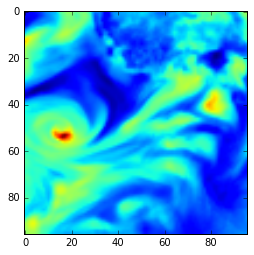

In [5]:

if __name__=="__main__":
    x,y,b,_,_,_,_,_,_ = load_detection_dataset(num_ims=40, use_negative=False)
    plt.imshow(x[0,0].T)
    
     
#      x = np.random.random((2,8,96,96))
#      plot_ims_with_boxes(x[:1,0], b[1:2],b[1:2], old=True)

In [24]:
# a,b,c,d = b[10]